In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import pandas as pd
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
import numpy as np


In [ ]:
# Download latest version
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("Path to dataset files:", path)

100%|██████████| 34.2k/34.2k [00:00<00:00, 26.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1


In [ ]:
# Read as csv
df = pd.read_csv(path + "/mushrooms.csv")

In [ ]:
display(df)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
# Check for Null Values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Change data type from 'object' to 'category'
for columns in df.columns:
  df[columns] = df[columns].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [ ]:
# Describe each column in the Dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Distinct Count of every value of each variable (notice that 'veil-type' has only one type of value)
for columns in df.columns:
  x = df[columns].value_counts()
  display(x)

,count
class,
e,4208
p,3916


,count
cap-shape,
x,3656
f,3152
k,828
b,452
s,32
c,4


,count
cap-surface,
y,3244
s,2556
f,2320
g,4


,count
cap-color,
n,2284
g,1840
e,1500
y,1072
w,1040
b,168
p,144
c,44
r,16


,count
bruises,
f,4748
t,3376


,count
odor,
n,3528
f,2160
s,576
y,576
a,400
l,400
p,256
c,192
m,36


,count
gill-attachment,
f,7914
a,210


,count
gill-spacing,
c,6812
w,1312


,count
gill-size,
b,5612
n,2512


,count
gill-color,
b,1728
p,1492
w,1202
n,1048
g,752
h,732
u,492
k,408
e,96


,count
stalk-shape,
t,4608
e,3516


,count
stalk-root,
b,3776
?,2480
e,1120
c,556
r,192


,count
stalk-surface-above-ring,
s,5176
k,2372
f,552
y,24


,count
stalk-surface-below-ring,
s,4936
k,2304
f,600
y,284


,count
stalk-color-above-ring,
w,4464
p,1872
g,576
n,448
b,432
o,192
e,96
c,36
y,8


,count
stalk-color-below-ring,
w,4384
p,1872
g,576
n,512
b,432
o,192
e,96
c,36
y,24


,count
veil-type,
p,8124


,count
veil-color,
w,7924
n,96
o,96
y,8


,count
ring-number,
o,7488
t,600
n,36


,count
ring-type,
p,3968
e,2776
l,1296
f,48
n,36


,count
spore-print-color,
w,2388
n,1968
k,1872
h,1632
r,72
b,48
o,48
u,48
y,48


,count
population,
v,4040
y,1712
s,1248
n,400
a,384
c,340


,count
habitat,
d,3148
g,2148
p,1144
l,832
u,368
m,292
w,192


In [ ]:
# Dataset format
print("Dataset formato:", df.shape)

Dataset formato: (8124, 23)


<ipython-input-12-14c190d1b255>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


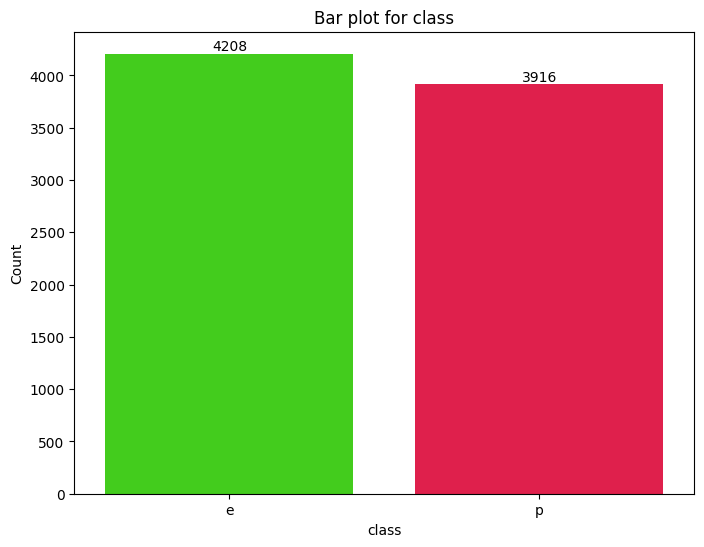

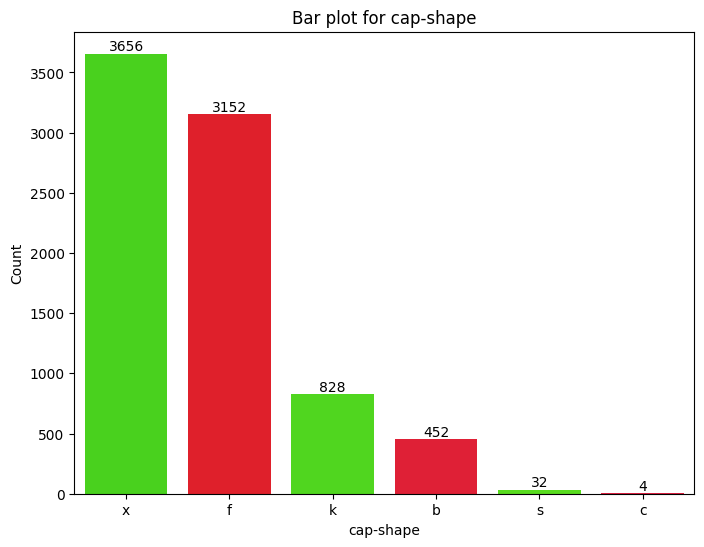

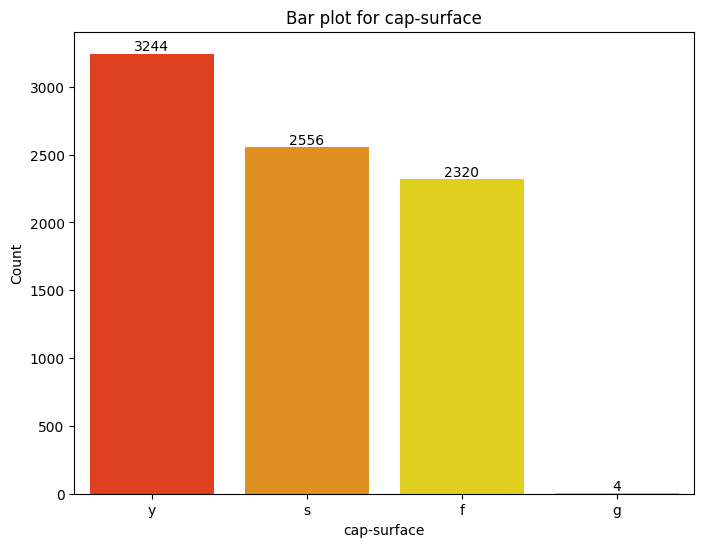

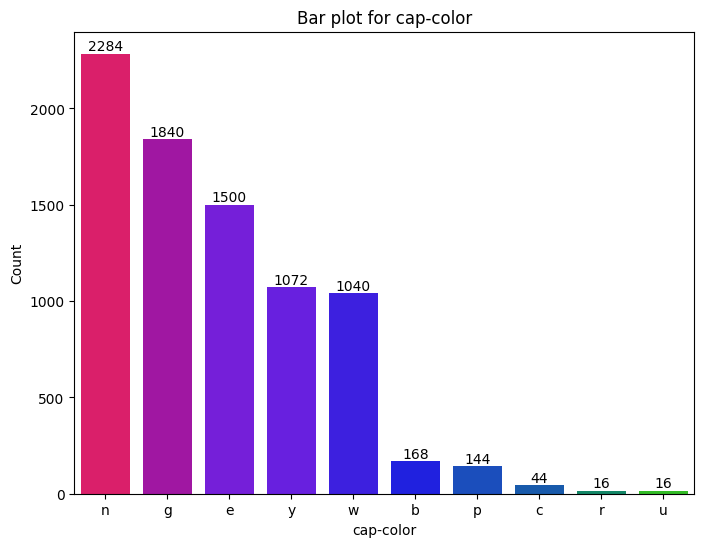

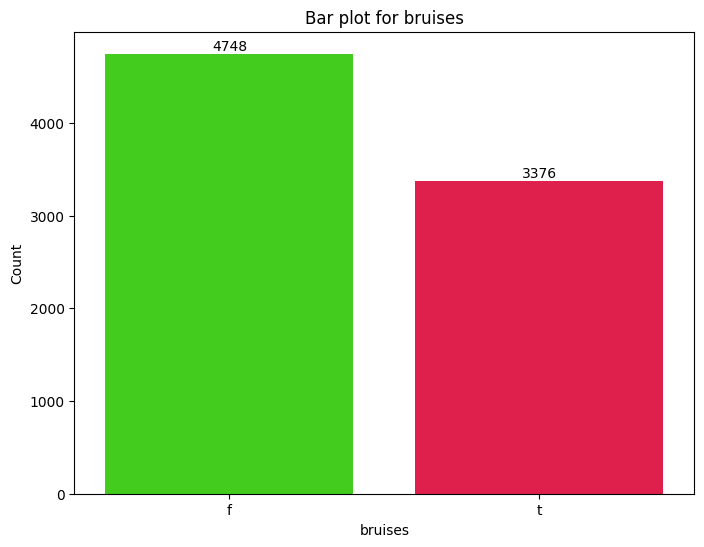

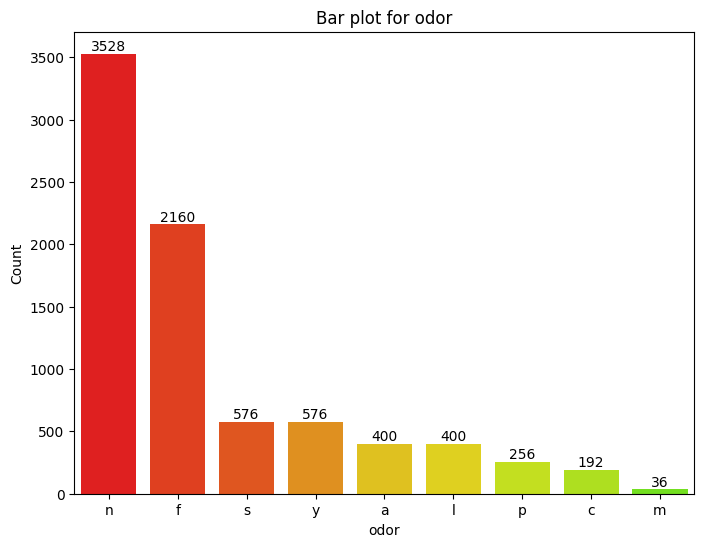

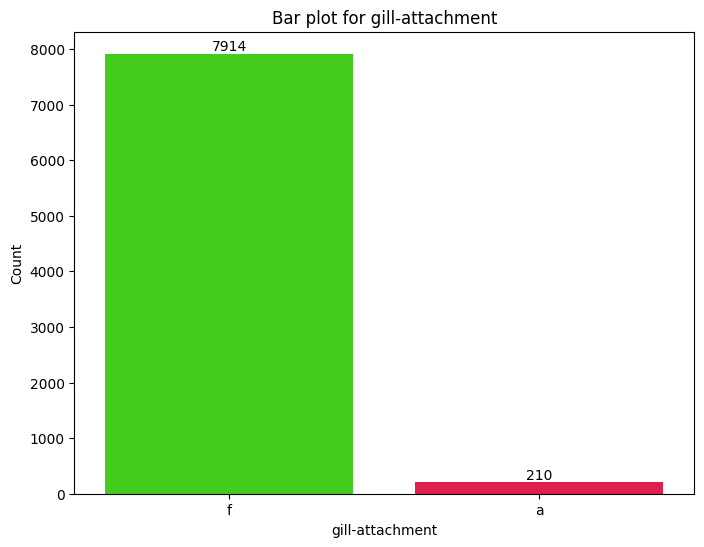

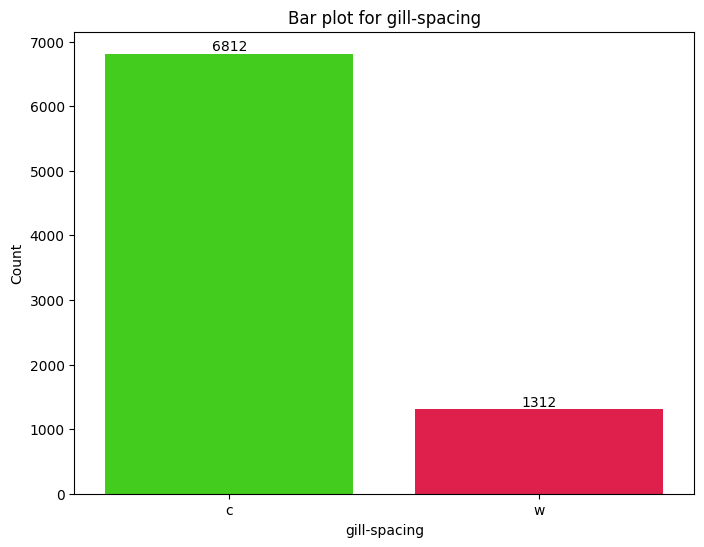

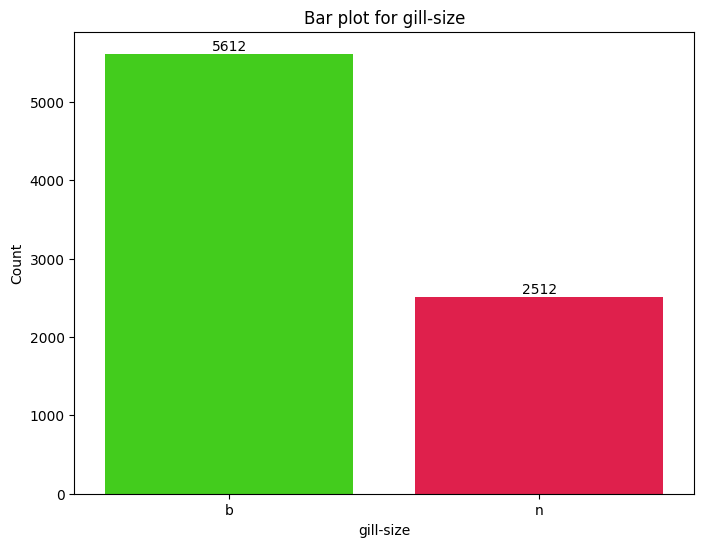

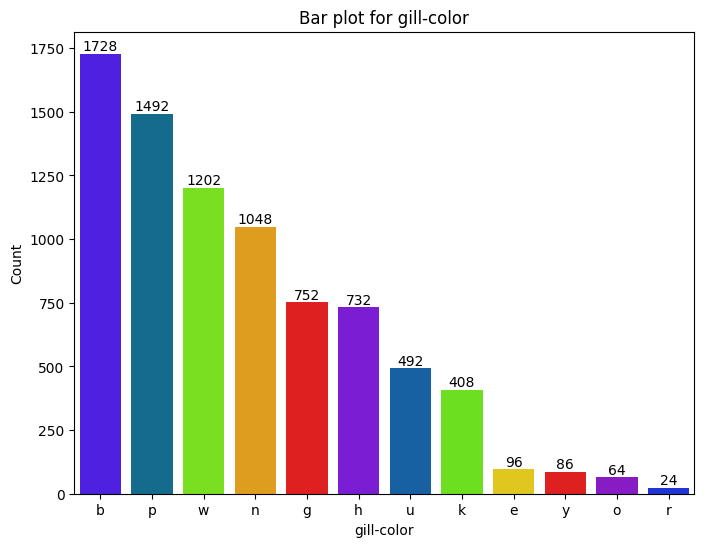

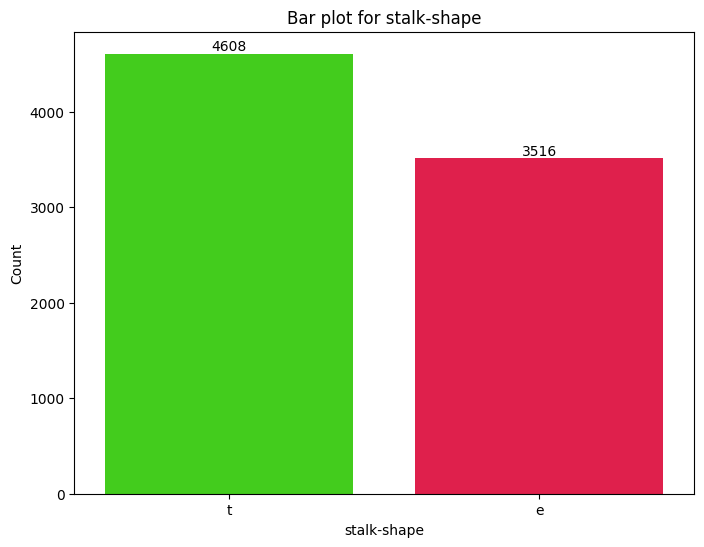

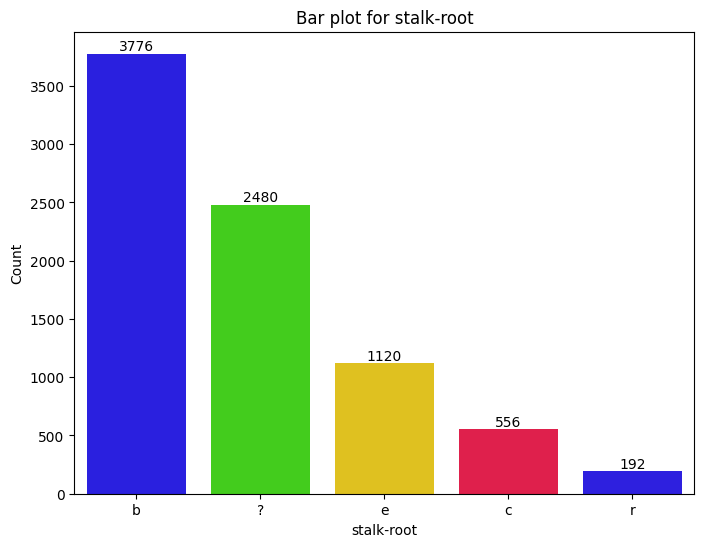

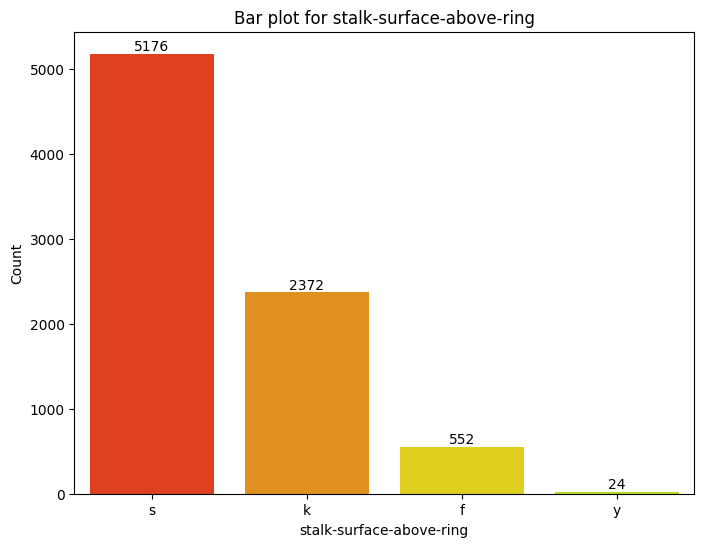

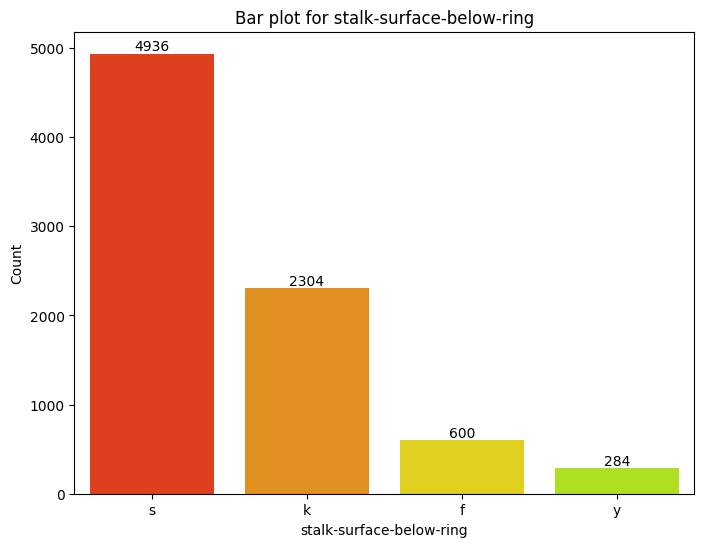

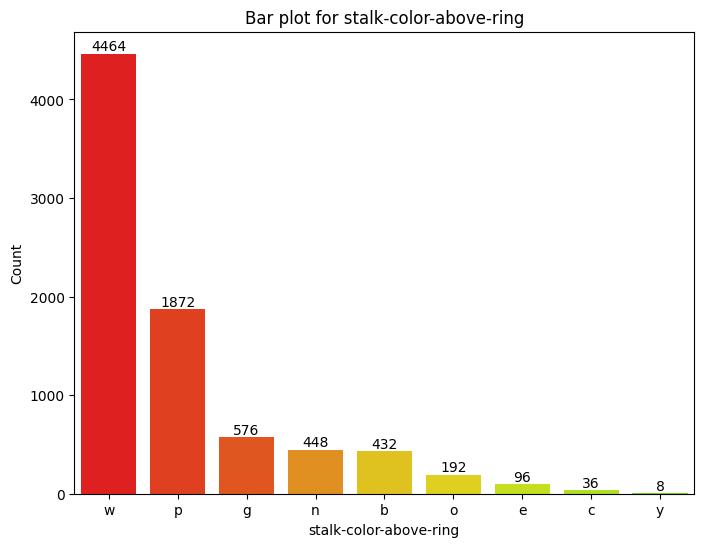

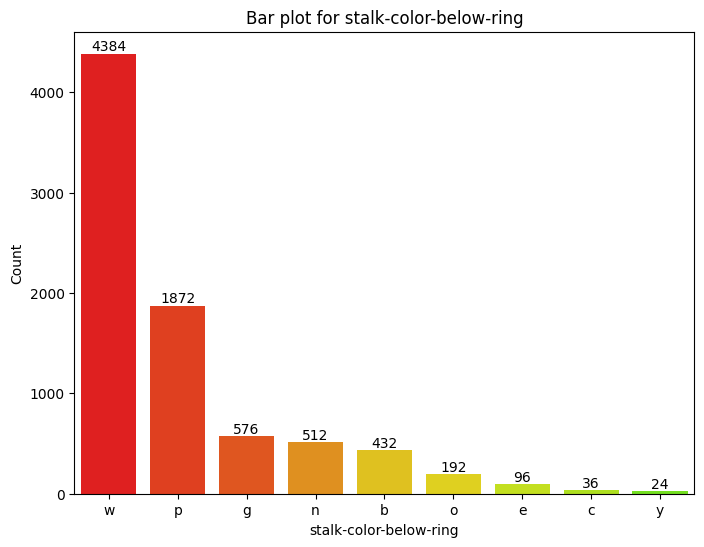

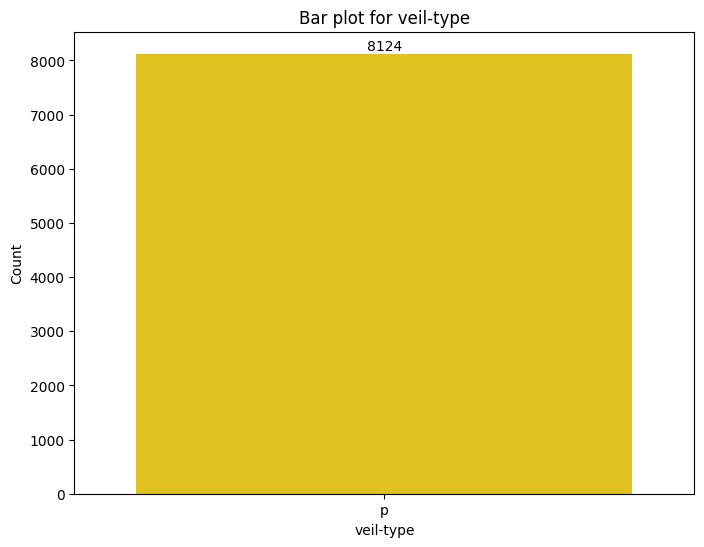

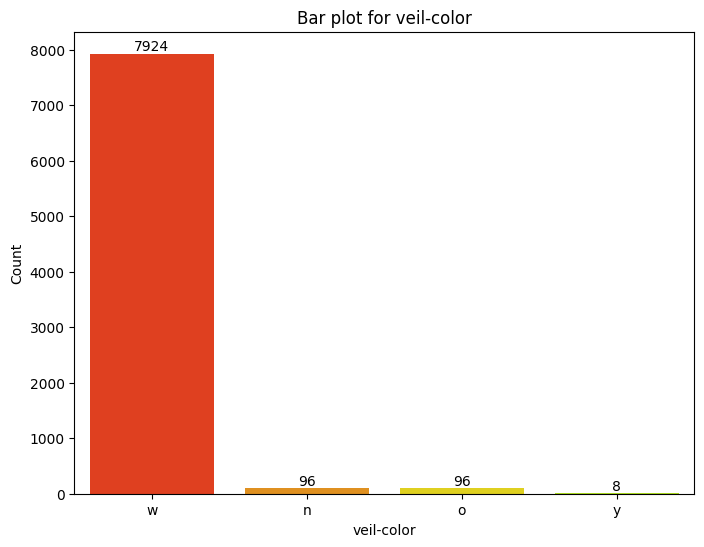

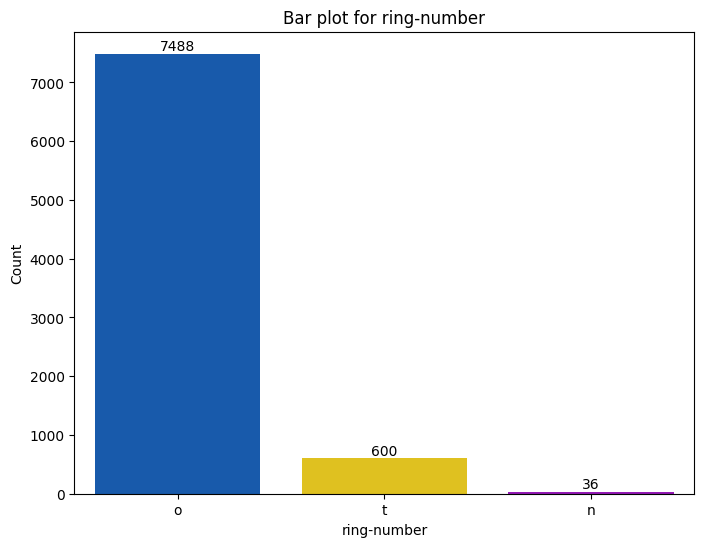

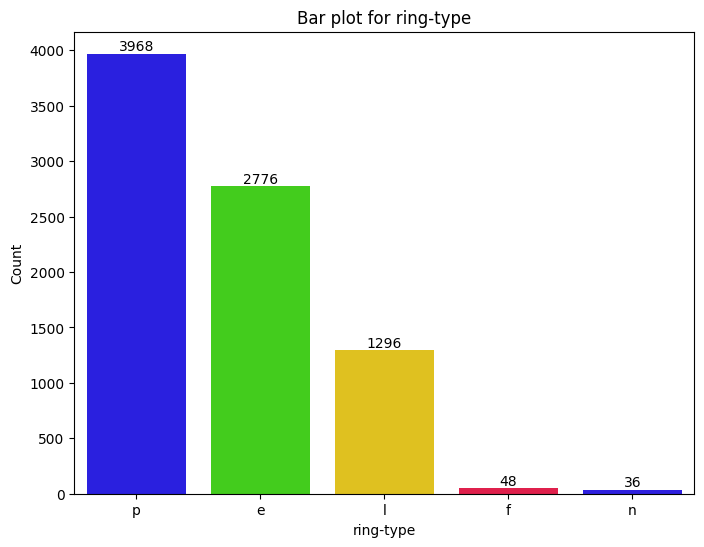

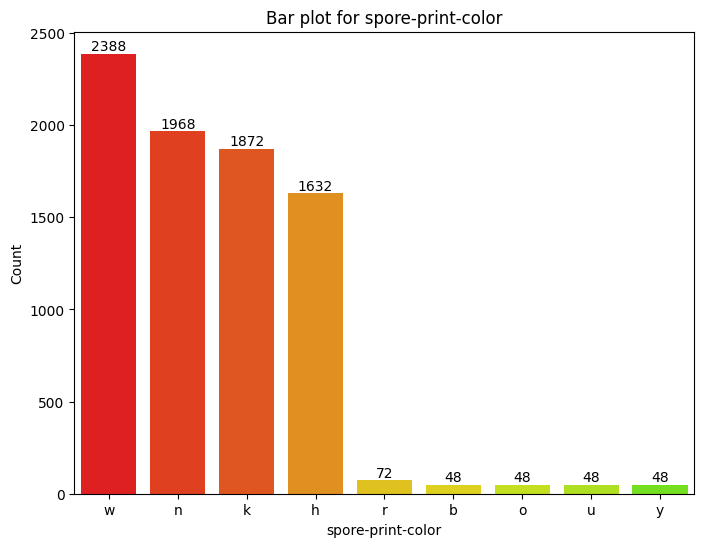

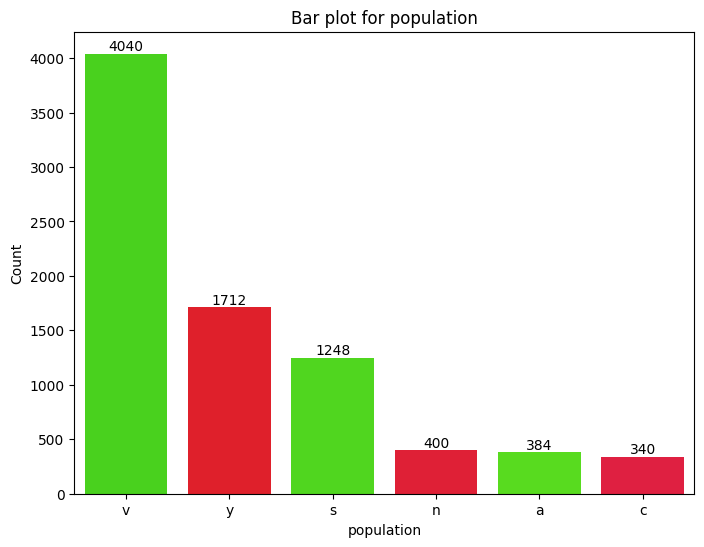

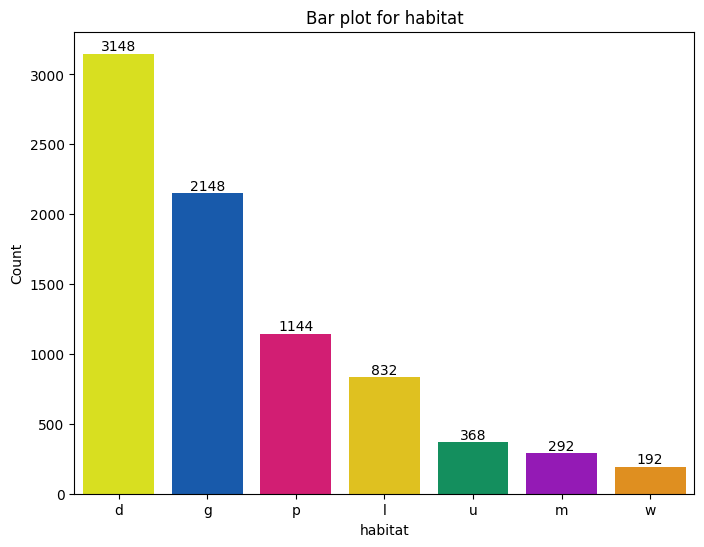

In [ ]:
# Loop through each column and plot a bar plot on each subplot
for i, column in enumerate(df.columns):
    plt.figure(figsize=(8, 6))
    count = df[column].value_counts()
    x=count.index.astype(str)
    y=count.values.astype(int)
    ax=sns.barplot(x=x, y=y, hue=x, palette="prism")
    plt.title(f'Bar plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    for container in ax.containers:
      ax.bar_label(container, fmt='%d')

#plt.tight_layout()  # Adjust spacing between plots
plt.show()

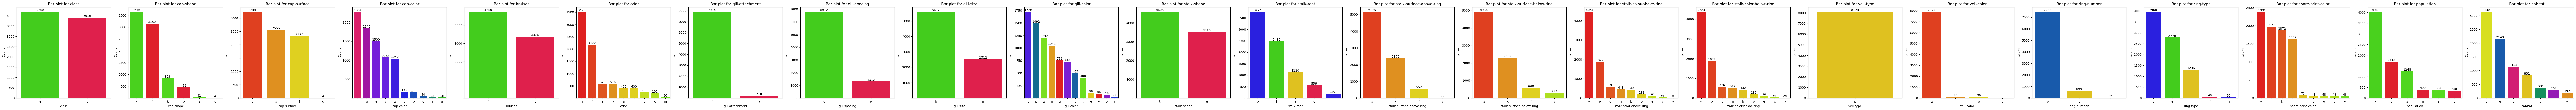

In [ ]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(5 * len(df.columns), 5))

# Loop through each column and plot a bar plot on each subplot
for i, column in enumerate(df.columns):
    count = df[column].value_counts()
    x=count.index.astype(str)
    y=count.values.astype(int)
    sns.barplot(x=x, y=y, ax=axes[i], hue=x, palette="prism")
    axes[i].set_title(f'Bar plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')


    for p in axes[i].patches:
      axes[i].text(
        p.get_x() + p.get_width() / 2,  # X position of the text
        p.get_height(),  # Y position of the text
        f'{p.get_height():.0f}',  # Text label, rounded to 0 decimal places
        ha='center', va='bottom'  # Alignment
    )

plt.tight_layout()  # Adjust spacing between plots
plt.show()

<ipython-input-14-5f795590128c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


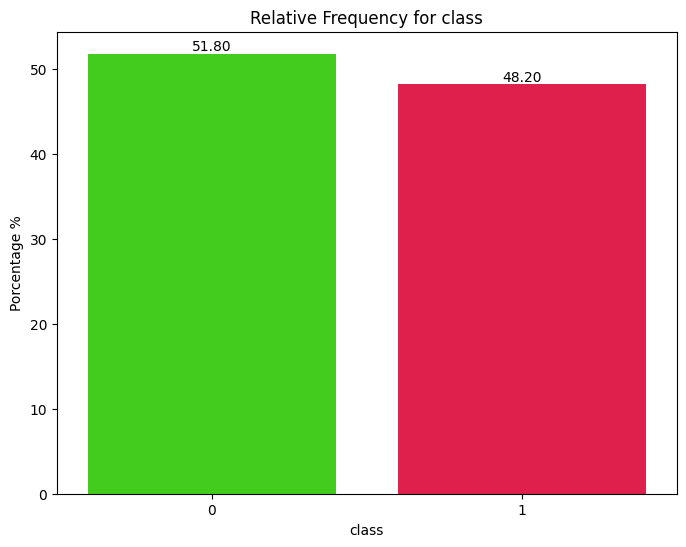

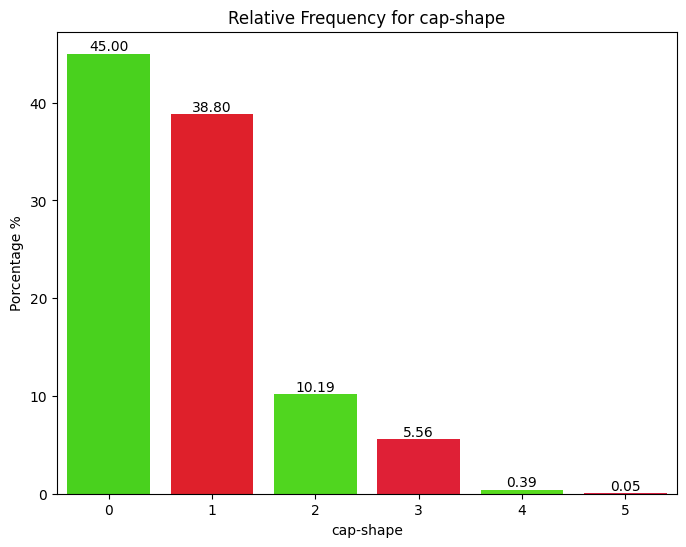

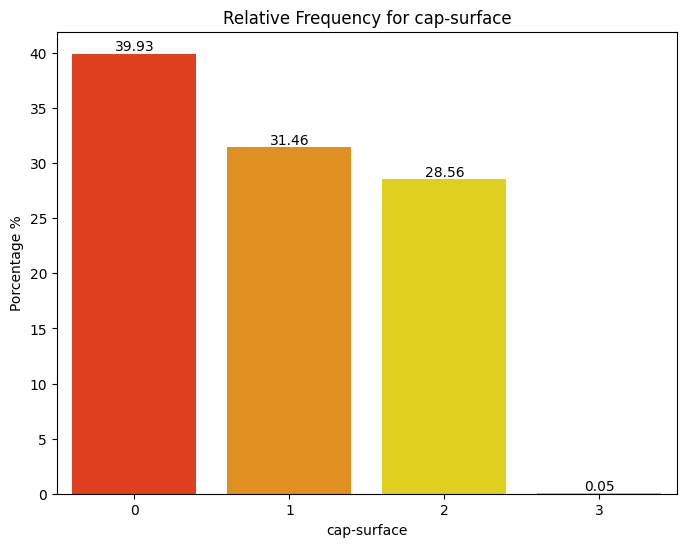

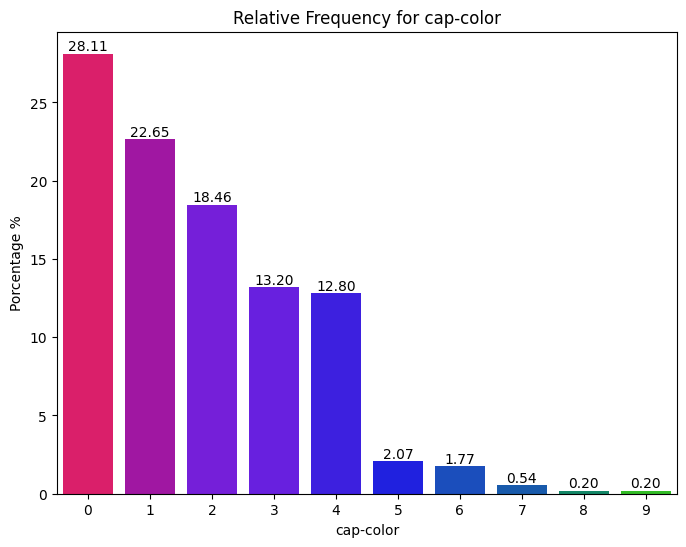

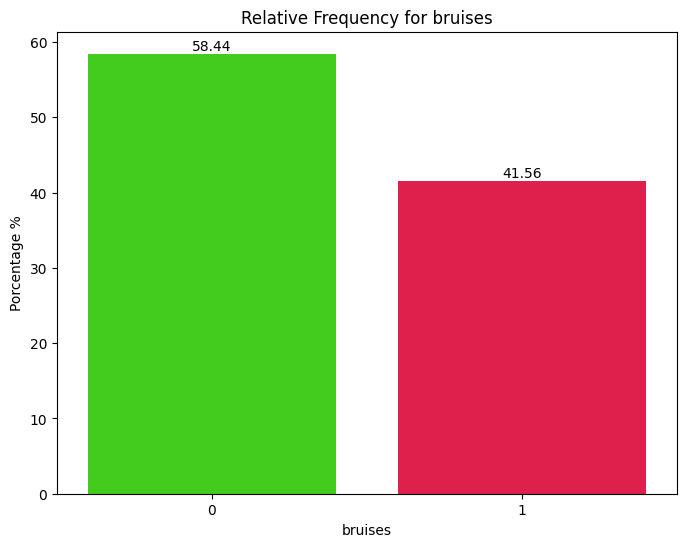

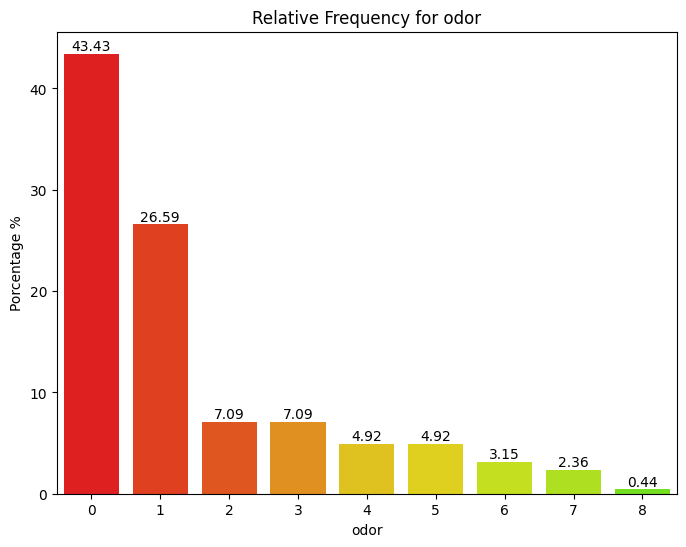

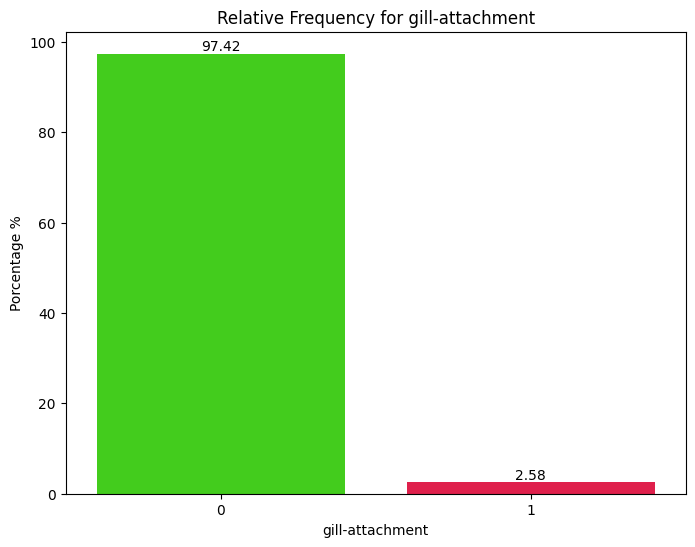

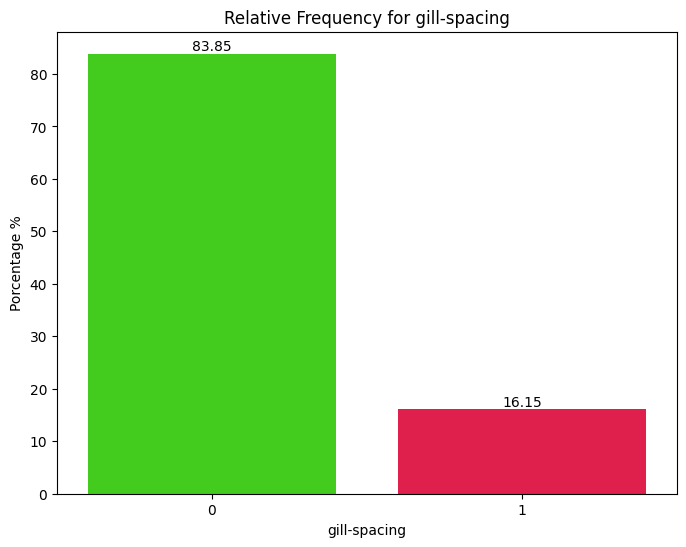

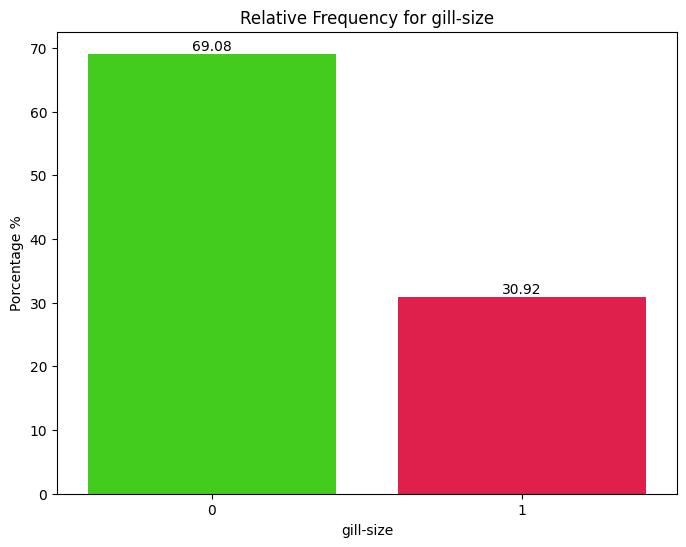

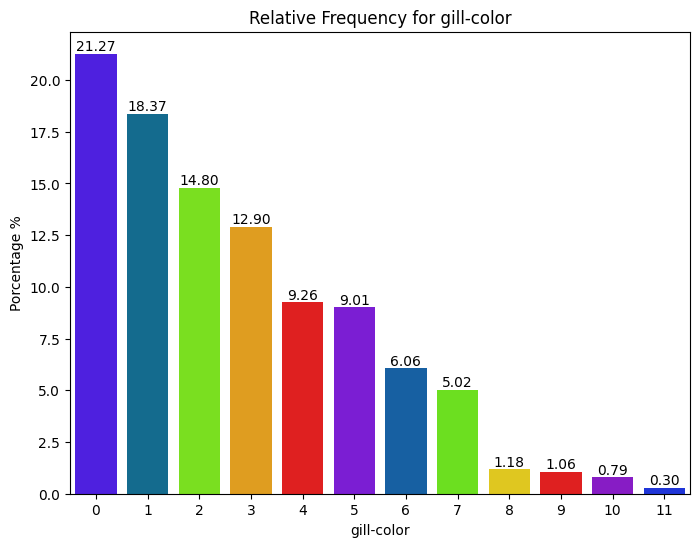

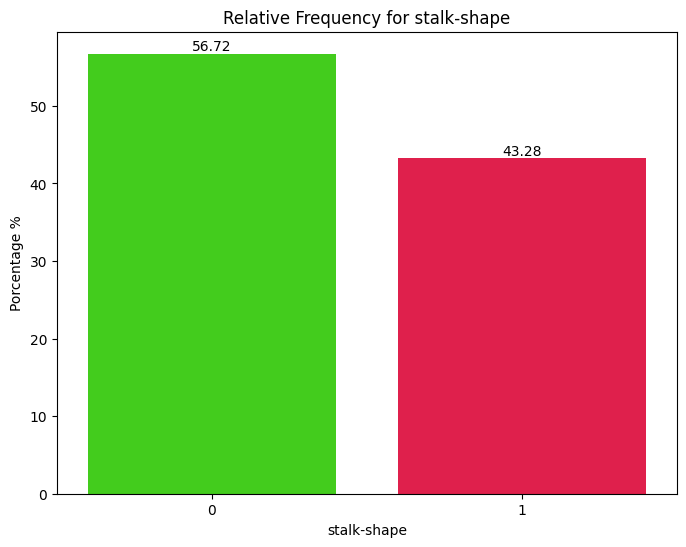

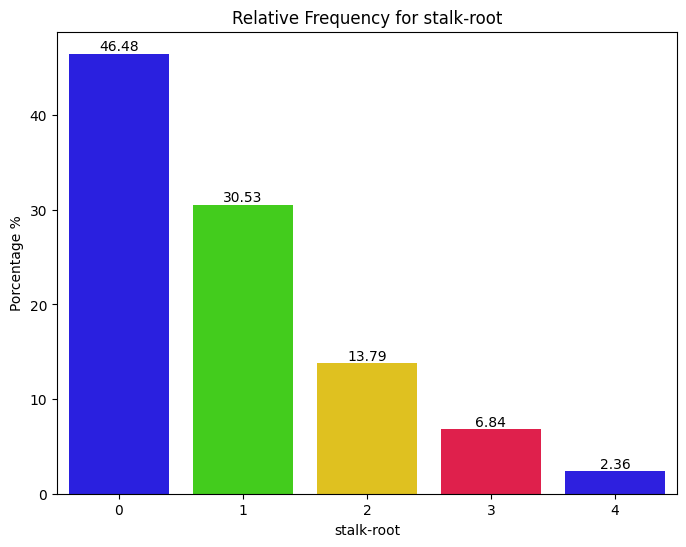

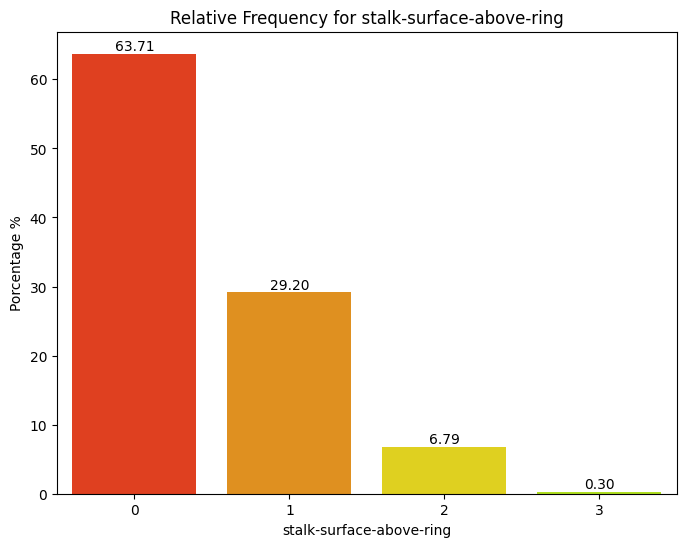

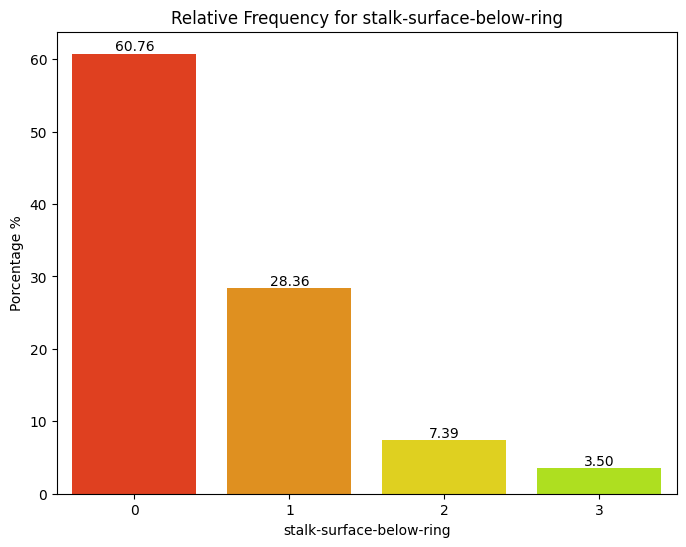

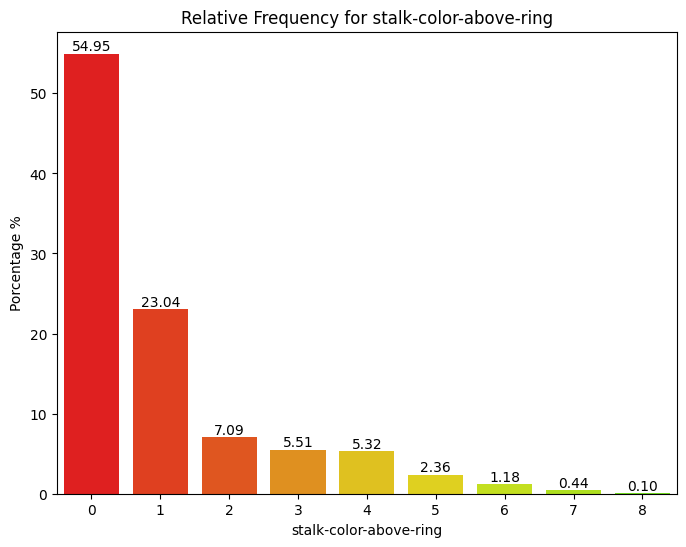

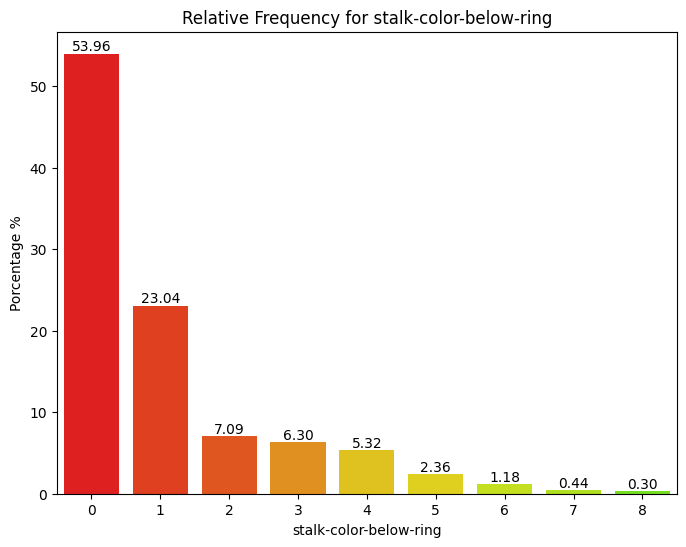

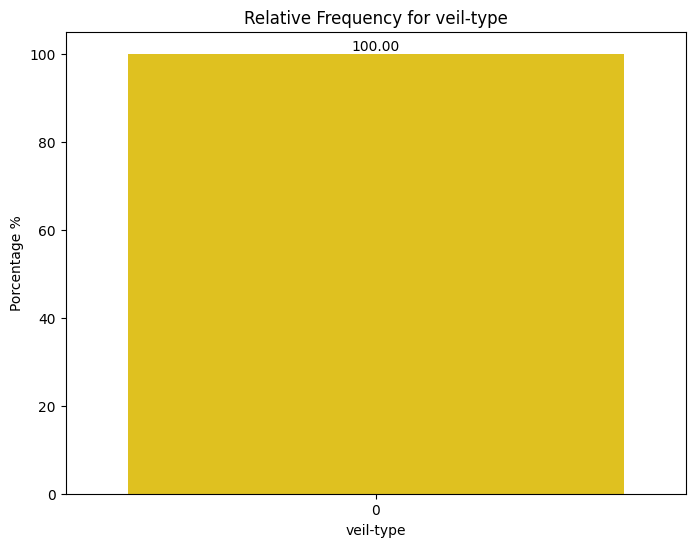

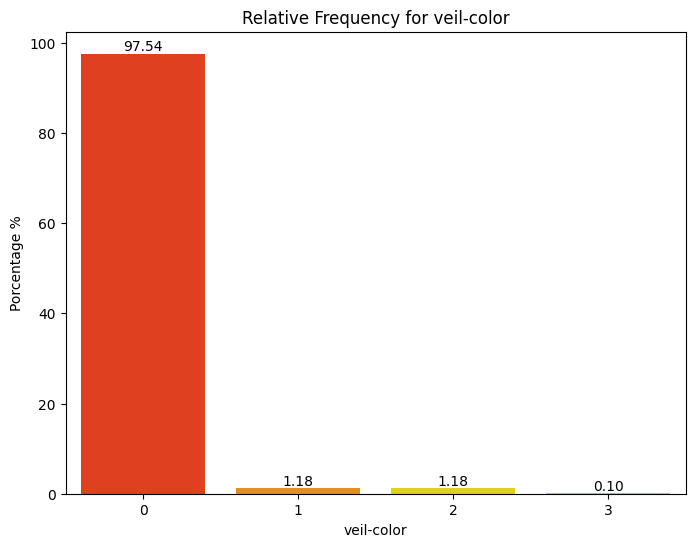

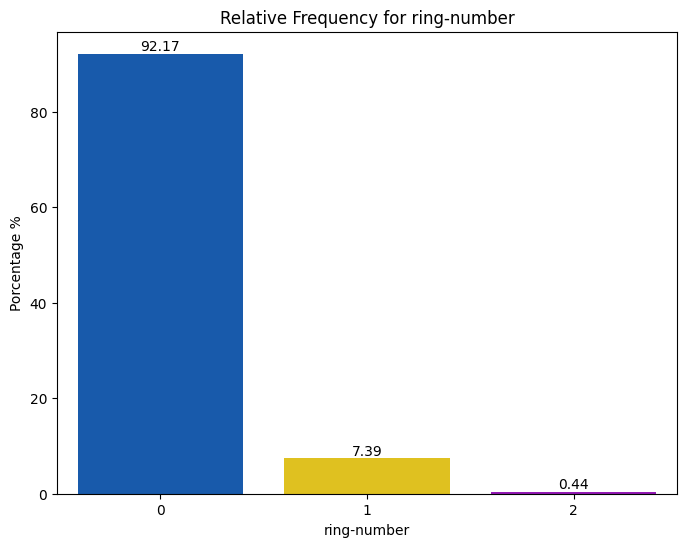

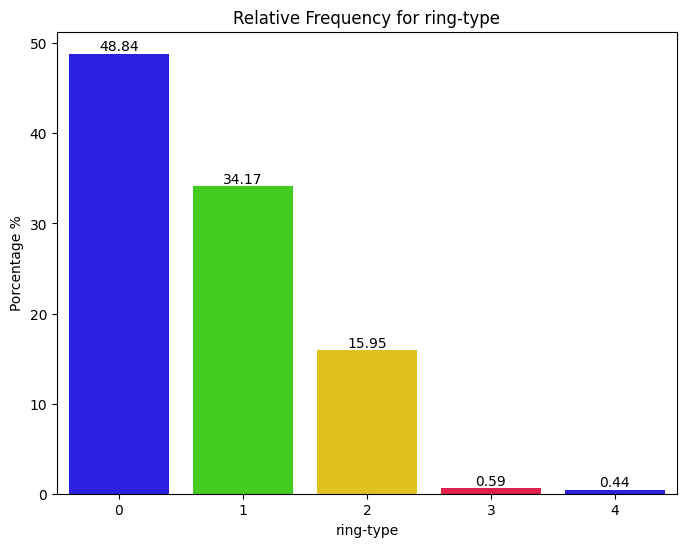

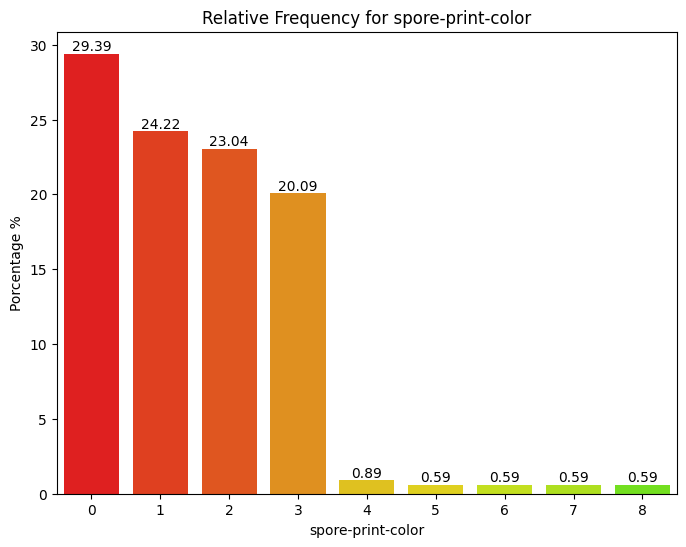

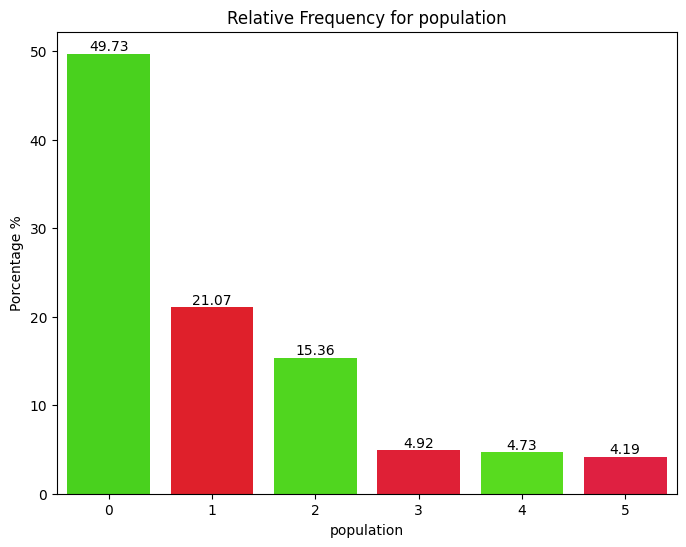

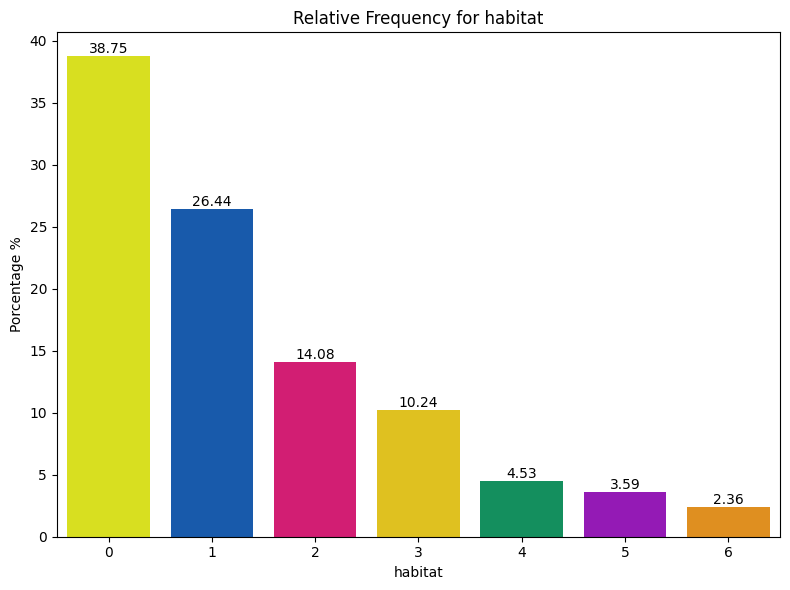

In [ ]:
# Bar plot of Relative Frequency
for i, column in enumerate(df.columns):
  plt.figure(figsize=(8, 6))
  column = df[column].value_counts().reset_index()
  column['frequencia_relativa'] = column['count'] / column['count'].sum()
  x=column.iloc[:,0].index.astype(str)
  y=(column['frequencia_relativa'].values.astype(float))*100
  ax = sns.barplot(x=x, y=y, hue=x, palette="prism")

  plt.title(f'Relative Frequency for {column.columns[0]}')
  plt.xlabel(column.columns[0])
  plt.ylabel('Porcentage %')

  for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()  # Adjust spacing between plots
plt.show()


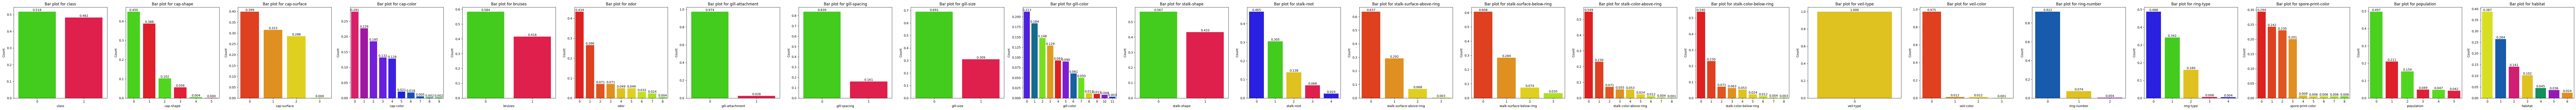

In [ ]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(5 * len(df.columns), 5))

for i, column in enumerate(df.columns):
  column = df[column].value_counts().reset_index()
  column['frequencia_relativa'] = column['count'] / column['count'].sum()
  x=column.iloc[:,0].index.astype(str)
  y=column['frequencia_relativa'].values.astype(float)
  sns.barplot(x=x, y=y, ax=axes[i], hue=x, palette="prism")
  axes[i].set_title(f'Bar plot for {column.columns[0]}')
  axes[i].set_xlabel(column.columns[0])
  axes[i].set_ylabel('Count')


  for p in axes[i].patches:
    axes[i].text(
      p.get_x() + p.get_width() / 2,  # X position of the text
      p.get_height(),  # Y position of the text
      f'{p.get_height():.3f}',  # Text label, rounded to 0 decimal places
      ha='center', va='bottom'  # Alignment
  )

plt.tight_layout()  # Adjust spacing between plots
plt.show()



In [ ]:
# Transformation of categorical data to numbers
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
# veil-type column has only one type of value and can be dropped
df['veil-type']

,veil-type
0,0
1,0
2,0
3,0
4,0
...,...
8119,0
8120,0
8121,0
8122,0


In [ ]:
df = df.drop('veil-type', axis=1)

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

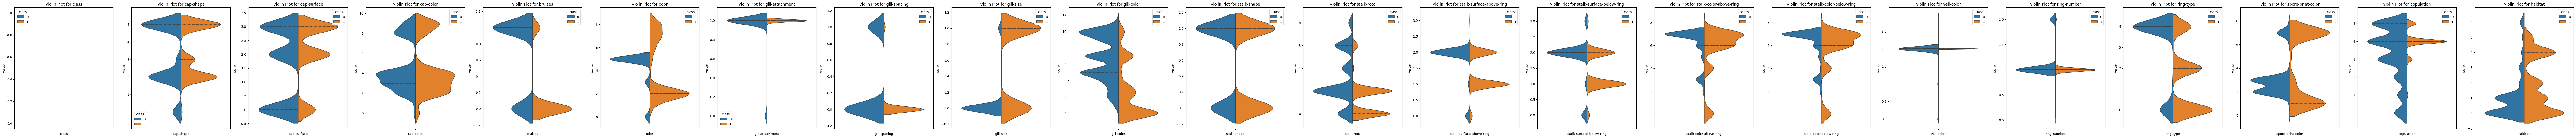

In [ ]:
# Violin Plot for each column
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(5 * len(df.columns), 6))

for i, col in enumerate(df.columns):
    sns.violinplot(data=df, y=col, ax=axes[i], hue = "class", split = True, inner = 'quart')
    axes[i].set_title(f'Violin Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#plt.savefig("mushrooms2.png", format='png', dpi=500)

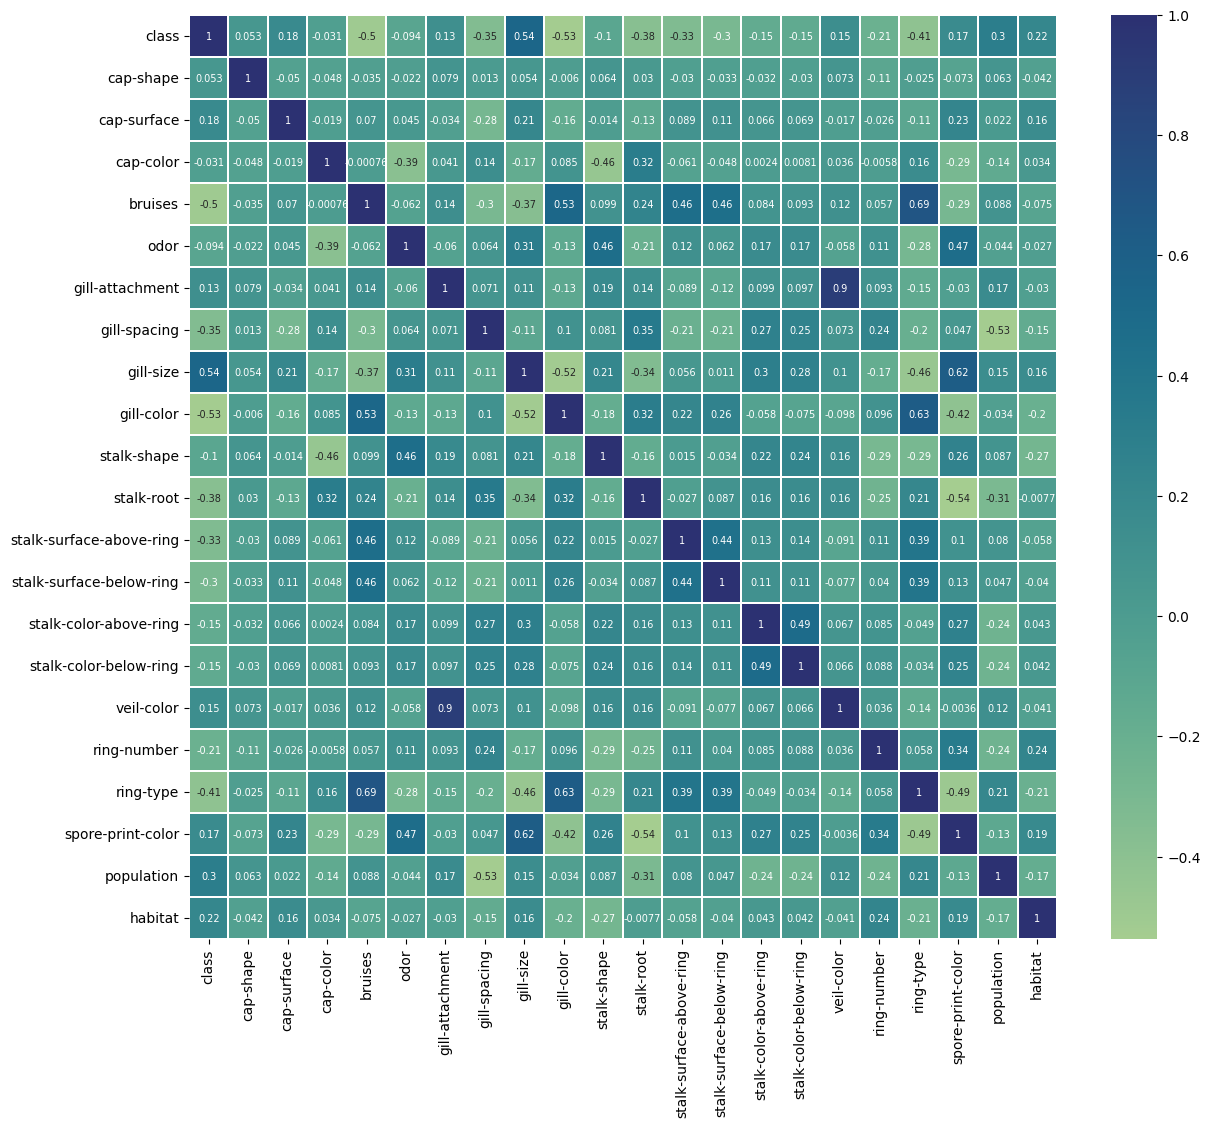

In [ ]:
# Correlation Diagram, can notice that 'gill-color' has the most negative correlation with 'class', value: -0.53
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="crest", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')